<a href="https://colab.research.google.com/github/junia3/FaceBlurring/blob/main/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face blur dataset tutorial

In [1]:
from google.colab import output
#@markdown ## Clone git repository(please do not run this cell more than one)
!git clone https://github.com/junia3/FaceBlurring.git

fatal: destination path 'FaceBlurring' already exists and is not an empty directory.


In [2]:
# Make directory to get sample data 
%cd '/content/FaceBlurring/data/'
!mkdir -p 'sample_root/clean/'
%cd 'sample_root/clean/'

/content/FaceBlurring/data
/content/FaceBlurring/data/sample_root/clean


In [3]:
# Download sample data and unzip to data directory
!gdown https://drive.google.com/uc?id=1jonSjJhywVMYHel3u8XNUQH684VyneWf
!unzip -o sample.zip
!rm sample.zip
output.clear()

In [4]:
# generate blur data with samples(It takes some time)
%cd '/content/FaceBlurring/dataset/'
!python create_blurimg.py --blur defocus --save True --label True

/content/FaceBlurring/dataset
Check all sample images(clean)...
7it [00:00, 1399.57it/s]
Create sample directories...
100% 427/427 [00:00<00:00, 41158.43it/s]
Generate blur images...
100% 427/427 [01:13<00:00,  5.80it/s]


# Embedding test with FaceNet

In [5]:
!pip install facenet_pytorch
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Distance, Cosine similarity

In [6]:
def L1_distance(emb1, emb2):
    return torch.abs(torch.sum(emb1 - emb2))

def L2_distance(emb1, emb2):
    return torch.sqrt(torch.sum(torch.square(emb1 - emb2)))

def cos_sim(A, B):
    return np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(B))

## Get clean and blur image to compare

In [7]:
from dataset import FaceDataset
face_dataset_blur = FaceDataset("../config/test.txt", 'blur')
face_dataset_clean = FaceDataset("../config/test.txt", 'clean')

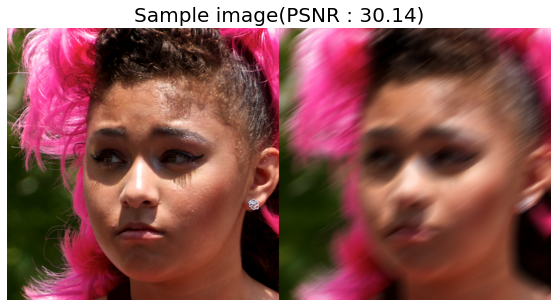

In [8]:
import matplotlib.pyplot as plt
clean_img_sample, _ = face_dataset_clean[0]
blur_img_sample, blur_img_psnr = face_dataset_blur[0]

compare = np.concatenate((clean_img_sample, blur_img_sample), 1)
plt.figure(figsize=(10, 5))
plt.imshow(compare)
plt.title(f"Sample image(PSNR : {blur_img_psnr:.2f})", fontsize=20)
plt.axis('off')
plt.show()

In [9]:
resnet = InceptionResnetV1(pretrained='vggface2').eval()
emb_clean = resnet(torch.Tensor(clean_img_sample).permute(2, 0, 1).unsqueeze(0))
emb_blur = resnet(torch.Tensor(blur_img_sample).permute(2, 0, 1).unsqueeze(0))

In [10]:
L1_dist = L1_distance(emb_clean, emb_blur)
L2_dist = L2_distance(emb_clean, emb_blur)
cossim = cos_sim(emb_clean.squeeze(0).detach().numpy(), emb_blur.squeeze(0).detach().numpy())

In [11]:
print(f'L1 distance : {L1_dist:.6f}')
print(f'L2 distance : {L2_dist:.6f}')
print(f'Cosine similarity : {cossim:.6f}')

L1 distance : 2.228560
L2 distance : 1.039416
Cosine similarity : 0.459808


## Compare with another sample

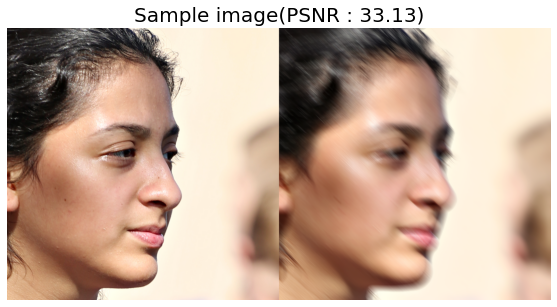

In [12]:
clean_img_sample, _ = face_dataset_clean[48]
blur_img_sample, blur_img_psnr = face_dataset_blur[48]

compare = np.concatenate((clean_img_sample, blur_img_sample), 1)
plt.figure(figsize=(10, 5))
plt.imshow(compare)
plt.title(f"Sample image(PSNR : {blur_img_psnr:.2f})", fontsize=20)
plt.axis('off')
plt.show()

In [13]:
resnet = InceptionResnetV1(pretrained='vggface2').eval()
emb_clean = resnet(torch.Tensor(clean_img_sample).permute(2, 0, 1).unsqueeze(0))
emb_blur = resnet(torch.Tensor(blur_img_sample).permute(2, 0, 1).unsqueeze(0))

In [14]:
L1_dist = L1_distance(emb_clean, emb_blur)
L2_dist = L2_distance(emb_clean, emb_blur)
cossim = cos_sim(emb_clean.squeeze(0).detach().numpy(), emb_blur.squeeze(0).detach().numpy())

In [15]:
print(f'L1 distance : {L1_dist:.6f}')
print(f'L2 distance : {L2_dist:.6f}')
print(f'Cosine similarity : {cossim:.6f}')

L1 distance : 2.338236
L2 distance : 0.806908
Cosine similarity : 0.674450
